DATA PREPROCESSING 

Checking actual  file names and file path

In [22]:
import os
print(os.getcwd())

/home/68d22a10-2ba3-47ef-adc1-86ad12b8c077/Data Analytics and Visualisation Project


In [24]:
import pandas as pd
df = pd.read_excel("Realtime Automated Fill Line Data.xlsx")
df.to_csv("data/processed/cleaned_data.csv", index=False)

In [26]:
import os
print(os.listdir())

['data', 'Realtime Automated Fill Line Data.xlsx', '.ipynb_checkpoints', 'Data Preprocessing .ipynb']


In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [30]:
import pandas as pd

# Loading the Real time Automated Fill Line Data Excel file
df = pd.read_excel("Realtime Automated Fill Line Data.xlsx")

# Previewing the data
df.head()

,PART\nID,TARE\nWEIGHT\n(g),GROSS\nWEIGHT\n(g),NET WEIGHT \n(g),PUMP ID,TARE SCALE ID,GROSS SCALE ID,CAP\nSTATION\nID,ACTUAL\nCOLLAPSE\n(mm),WELDTIME\n(sec),WELD\nPOWER\n(WT),WELD\nZERO\nPOINT (mm),WELD CLAMP\nFORCE\n(N),TOTAL\nCOLLAPSE\n(mm),WELDER\nID,REJECT\nTYPE,RATE,SRC,ENTRY\nTIMESTAMP
0,1,227.613312,238.416916,10.803604,1,1,1,1,0.1030,0.231,153.395905,6.9685,903,0.1875,4,0,80,P,17-DEC-2025 23:41:36
1,2,227.899094,238.631012,10.731918,2,2,2,2,0.1085,0.254,151.402512,7.2300,899,0.1790,1,0,80,P,17-DEC-2025 23:41:36
2,3,227.839508,238.615402,10.775894,1,1,1,1,0.1075,0.265,150.885498,6.7490,904,0.1680,6,0,80,P,17-DEC-2025 23:41:36
3,4,227.849213,238.619476,10.770264,2,2,2,2,0.1015,0.232,146.727356,6.7465,901,0.1770,3,0,80,P,17-DEC-2025 23:41:38
4,5,227.444092,238.233490,10.789398,1,1,1,1,0.1090,0.246,153.068405,6.3095,902,0.1795,5,0,80,P,17-DEC-2025 23:41:37


In [31]:
#Checking which columns I have in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7828 entries, 0 to 7827
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PART
ID               7828 non-null   int64  
 1   TARE
WEIGHT
(g)       7828 non-null   float64
 2   GROSS
WEIGHT
(g)      7828 non-null   float64
 3   NET WEIGHT 
(g)       7828 non-null   float64
 4   PUMP ID               7828 non-null   int64  
 5   TARE SCALE ID         7828 non-null   int64  
 6   GROSS SCALE ID        7828 non-null   int64  
 7   CAP
STATION
ID        7828 non-null   int64  
 8   ACTUAL
COLLAPSE
(mm)  7828 non-null   float64
 9   WELDTIME
(sec)        7828 non-null   float64
 10  WELD
POWER
(WT)       7828 non-null   float64
 11  WELD
ZERO
POINT (mm)  7828 non-null   float64
 12  WELD CLAMP
FORCE
(N)  7828 non-null   int64  
 13  TOTAL
COLLAPSE
(mm)   7828 non-null   float64
 14  WELDER
ID             7828 non-null   int64  
 15  REJECT
TYPE          

From this we can tell the data set is rich without any missing values 

In [32]:
# Checking the column names
df.columns

Index(['PART\nID', 'TARE\nWEIGHT\n(g)', 'GROSS\nWEIGHT\n(g)',
       'NET WEIGHT \n(g)', 'PUMP ID', 'TARE SCALE ID', 'GROSS SCALE ID',
       'CAP\nSTATION\nID', 'ACTUAL\nCOLLAPSE\n(mm)', 'WELDTIME\n(sec)',
       'WELD\nPOWER\n(WT)', 'WELD\nZERO\nPOINT (mm)', 'WELD CLAMP\nFORCE\n(N)',
       'TOTAL\nCOLLAPSE\n(mm)', 'WELDER\nID', 'REJECT\nTYPE', 'RATE', 'SRC',
       'ENTRY\nTIMESTAMP'],
      dtype='object')

In [33]:
# Cleaning column names to:remove line breaks, replace spaces with underscores, lowercase everything
df.columns = (
    df.columns
    .str.replace("\n", "_", regex=False)   # remove line breaks
    .str.replace(" ", "_", regex=False)    # replace spaces
    .str.strip()                           # remove leading/trailing spaces
    .str.lower()                           # lowercase
)

df.columns


Index(['part_id', 'tare_weight_(g)', 'gross_weight_(g)', 'net_weight__(g)',
       'pump_id', 'tare_scale_id', 'gross_scale_id', 'cap_station_id',
       'actual_collapse_(mm)', 'weldtime_(sec)', 'weld_power_(wt)',
       'weld_zero_point_(mm)', 'weld_clamp_force_(n)', 'total_collapse_(mm)',
       'welder_id', 'reject_type', 'rate', 'src', 'entry_timestamp'],
      dtype='object')

In [34]:
#Checking for missing values
df.isna().sum()


part_id                 0
tare_weight_(g)         0
gross_weight_(g)        0
net_weight__(g)         0
pump_id                 0
tare_scale_id           0
gross_scale_id          0
cap_station_id          0
actual_collapse_(mm)    0
weldtime_(sec)          0
weld_power_(wt)         0
weld_zero_point_(mm)    0
weld_clamp_force_(n)    0
total_collapse_(mm)     0
welder_id               0
reject_type             0
rate                    0
src                     0
entry_timestamp         0
dtype: int64

In [35]:
#Checking for numeric columns so that we know which columns to scale for PCA
numeric_cols = [
    "tare_weight_(g)",
    "gross_weight_(g)",
    "net_weight__(g)",
    "actual_collapse_(mm)",
    "weldtime_(sec)",
    "weld_power_(wt)",
    "weld_zero_point_(mm)",
    "weld_clamp_force_(n)",
    "total_collapse_(mm)",
    "rate"
]

df[numeric_cols].head()


,tare_weight_(g),gross_weight_(g),net_weight__(g),actual_collapse_(mm),weldtime_(sec),weld_power_(wt),weld_zero_point_(mm),weld_clamp_force_(n),total_collapse_(mm),rate
0,227.613312,238.416916,10.803604,0.1030,0.231,153.395905,6.9685,903,0.1875,80
1,227.899094,238.631012,10.731918,0.1085,0.254,151.402512,7.2300,899,0.1790,80
2,227.839508,238.615402,10.775894,0.1075,0.265,150.885498,6.7490,904,0.1680,80
3,227.849213,238.619476,10.770264,0.1015,0.232,146.727356,6.7465,901,0.1770,80
4,227.444092,238.233490,10.789398,0.1090,0.246,153.068405,6.3095,902,0.1795,80


In [36]:
#Scaling numeric columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df[numeric_cols])

scaled_df = pd.DataFrame(
    scaled_data,
    columns=[f"{col}_scaled" for col in numeric_cols]
)

scaled_df.head()


,tare_weight_(g)_scaled,gross_weight_(g)_scaled,net_weight__(g)_scaled,actual_collapse_(mm)_scaled,weldtime_(sec)_scaled,weld_power_(wt)_scaled,weld_zero_point_(mm)_scaled,weld_clamp_force_(n)_scaled,total_collapse_(mm)_scaled,rate_scaled
0,-0.047337,0.122443,0.669806,-0.231007,-1.158885,0.208604,0.135311,0.080666,0.992849,0.0
1,0.603481,0.591595,0.043482,0.543249,0.018693,0.001950,0.606773,0.008920,0.313448,0.0
2,0.467785,0.557389,0.427702,0.402481,0.581882,-0.051649,-0.260428,0.098602,-0.565742,0.0
3,0.489886,0.566317,0.378508,-0.442192,-1.107687,-0.482721,-0.264935,0.044793,0.153602,0.0
4,-0.432706,-0.279502,0.545688,0.613667,-0.390899,0.174652,-1.052807,0.062729,0.353428,0.0


In [37]:
#Adding back useful non-numeric columns (we keep identifiers and timestamps so that the GitHub dashboard can filter and display them).
#This step is useful for dashboard and useful Principal Component Analysis (PCA) interpretation

scaled_df["part_id"] = df["part_id"]
scaled_df["pump_id"] = df["pump_id"]
scaled_df["tare_scale_id"] = df["tare_scale_id"]
scaled_df["gross_scale_id"] = df["gross_scale_id"]
scaled_df["cap_station_id"] = df["cap_station_id"]
scaled_df["welder_id"] = df["welder_id"]
scaled_df["reject_type"] = df["reject_type"]
scaled_df["src"] = df["src"]
scaled_df["entry_timestamp"] = df["entry_timestamp"]

scaled_df.head()


,tare_weight_(g)_scaled,gross_weight_(g)_scaled,net_weight__(g)_scaled,actual_collapse_(mm)_scaled,weldtime_(sec)_scaled,weld_power_(wt)_scaled,weld_zero_point_(mm)_scaled,weld_clamp_force_(n)_scaled,total_collapse_(mm)_scaled,rate_scaled,part_id,pump_id,tare_scale_id,gross_scale_id,cap_station_id,welder_id,reject_type,src,entry_timestamp
0,-0.047337,0.122443,0.669806,-0.231007,-1.158885,0.208604,0.135311,0.080666,0.992849,0.0,1,1,1,1,1,4,0,P,17-DEC-2025 23:41:36
1,0.603481,0.591595,0.043482,0.543249,0.018693,0.001950,0.606773,0.008920,0.313448,0.0,2,2,2,2,2,1,0,P,17-DEC-2025 23:41:36
2,0.467785,0.557389,0.427702,0.402481,0.581882,-0.051649,-0.260428,0.098602,-0.565742,0.0,3,1,1,1,1,6,0,P,17-DEC-2025 23:41:36
3,0.489886,0.566317,0.378508,-0.442192,-1.107687,-0.482721,-0.264935,0.044793,0.153602,0.0,4,2,2,2,2,3,0,P,17-DEC-2025 23:41:38
4,-0.432706,-0.279502,0.545688,0.613667,-0.390899,0.174652,-1.052807,0.062729,0.353428,0.0,5,1,1,1,1,5,0,P,17-DEC-2025 23:41:37


In [39]:
import os

# Creating the directory structure if it doesn't exist
os.makedirs("data/raw", exist_ok=True)

# Writing the file
with open("data/raw/placeholder.txt", "w") as f:
    f.write("This folder holds the original raw dataset (not uploaded for confidentiality).")


In [40]:
os.listdir("data/raw")

['placeholder.txt']

In [41]:
#Checking if the raw (original) and cleaned (processed) data set exists

import os

os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)
os.listdir("data")


['pca_results.csv', 'raw', 'limits.json', '.ipynb_checkpoints', 'processed']

In [42]:
#Saving the cleaned data sheet

scaled_df.to_csv("data/processed/cleaned_data.csv", index=False)


In [43]:
import os
os.makedirs("data/processed", exist_ok=True)

In [44]:
scaled_df.to_csv("data/processed/cleaned_data.csv", index=False)

In [45]:
#Confirming the saved file exists

import os
os.listdir("data/processed")


['pca_output.csv',
 'pca_explained_variance.csv',
 'cleaned_data.csv',
 'pca_loadings.csv']

In [46]:
import os
os.path.abspath("data/processed/cleaned_data.csv")

'/home/68d22a10-2ba3-47ef-adc1-86ad12b8c077/Data Analytics and Visualisation Project/data/processed/cleaned_data.csv'

In [47]:
import os
print("Current working directory:", os.getcwd())
print("File exists:", os.path.exists("data/processed/cleaned_data.csv"))

Current working directory: /home/68d22a10-2ba3-47ef-adc1-86ad12b8c077/Data Analytics and Visualisation Project
File exists: True


In [48]:
#Loading the cleaned data set

df = pd.read_csv("data/processed/cleaned_data.csv")
df.head()

,tare_weight_(g)_scaled,gross_weight_(g)_scaled,net_weight__(g)_scaled,actual_collapse_(mm)_scaled,weldtime_(sec)_scaled,weld_power_(wt)_scaled,weld_zero_point_(mm)_scaled,weld_clamp_force_(n)_scaled,total_collapse_(mm)_scaled,rate_scaled,part_id,pump_id,tare_scale_id,gross_scale_id,cap_station_id,welder_id,reject_type,src,entry_timestamp
0,-0.047337,0.122443,0.669806,-0.231007,-1.158885,0.208604,0.135311,0.080666,0.992849,0.0,1,1,1,1,1,4,0,P,17-DEC-2025 23:41:36
1,0.603481,0.591595,0.043482,0.543249,0.018693,0.001950,0.606773,0.008920,0.313448,0.0,2,2,2,2,2,1,0,P,17-DEC-2025 23:41:36
2,0.467785,0.557389,0.427702,0.402481,0.581882,-0.051649,-0.260428,0.098602,-0.565742,0.0,3,1,1,1,1,6,0,P,17-DEC-2025 23:41:36
3,0.489886,0.566317,0.378508,-0.442192,-1.107687,-0.482721,-0.264935,0.044793,0.153602,0.0,4,2,2,2,2,3,0,P,17-DEC-2025 23:41:38
4,-0.432706,-0.279502,0.545688,0.613667,-0.390899,0.174652,-1.052807,0.062729,0.353428,0.0,5,1,1,1,1,5,0,P,17-DEC-2025 23:41:37


PRINCIPAL COMPONENT ANALYSIS

In [49]:
#Importing libraries for PCA
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#Loading the cleaned data set for PCA
df = pd.read_csv("data/processed/cleaned_data.csv")
df.head()


,tare_weight_(g)_scaled,gross_weight_(g)_scaled,net_weight__(g)_scaled,actual_collapse_(mm)_scaled,weldtime_(sec)_scaled,weld_power_(wt)_scaled,weld_zero_point_(mm)_scaled,weld_clamp_force_(n)_scaled,total_collapse_(mm)_scaled,rate_scaled,part_id,pump_id,tare_scale_id,gross_scale_id,cap_station_id,welder_id,reject_type,src,entry_timestamp
0,-0.047337,0.122443,0.669806,-0.231007,-1.158885,0.208604,0.135311,0.080666,0.992849,0.0,1,1,1,1,1,4,0,P,17-DEC-2025 23:41:36
1,0.603481,0.591595,0.043482,0.543249,0.018693,0.001950,0.606773,0.008920,0.313448,0.0,2,2,2,2,2,1,0,P,17-DEC-2025 23:41:36
2,0.467785,0.557389,0.427702,0.402481,0.581882,-0.051649,-0.260428,0.098602,-0.565742,0.0,3,1,1,1,1,6,0,P,17-DEC-2025 23:41:36
3,0.489886,0.566317,0.378508,-0.442192,-1.107687,-0.482721,-0.264935,0.044793,0.153602,0.0,4,2,2,2,2,3,0,P,17-DEC-2025 23:41:38
4,-0.432706,-0.279502,0.545688,0.613667,-0.390899,0.174652,-1.052807,0.062729,0.353428,0.0,5,1,1,1,1,5,0,P,17-DEC-2025 23:41:37


In [51]:
#Selecting the numeric features for PCA
scaled_cols = [col for col in df.columns if col.endswith("_scaled")]
df_scaled = df[scaled_cols]
df_scaled.head()


,tare_weight_(g)_scaled,gross_weight_(g)_scaled,net_weight__(g)_scaled,actual_collapse_(mm)_scaled,weldtime_(sec)_scaled,weld_power_(wt)_scaled,weld_zero_point_(mm)_scaled,weld_clamp_force_(n)_scaled,total_collapse_(mm)_scaled,rate_scaled
0,-0.047337,0.122443,0.669806,-0.231007,-1.158885,0.208604,0.135311,0.080666,0.992849,0.0
1,0.603481,0.591595,0.043482,0.543249,0.018693,0.001950,0.606773,0.008920,0.313448,0.0
2,0.467785,0.557389,0.427702,0.402481,0.581882,-0.051649,-0.260428,0.098602,-0.565742,0.0
3,0.489886,0.566317,0.378508,-0.442192,-1.107687,-0.482721,-0.264935,0.044793,0.153602,0.0
4,-0.432706,-0.279502,0.545688,0.613667,-0.390899,0.174652,-1.052807,0.062729,0.353428,0.0


In [53]:
#Showing variance each principal component captures
pca = PCA()
pca_components = pca.fit_transform(df_scaled)

explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.57716311, 0.2186602 , 0.09006953, 0.04960513, 0.04013802,
       0.01605129, 0.00584881, 0.00246391, 0.        , 0.        ])

In [55]:
import pandas as pd

ev = pd.DataFrame({
    "component": [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))],
    "explained_variance_ratio": pca.explained_variance_ratio_
})

ev.to_csv("data/processed/pca_explained_variance.csv", index=False)


In [60]:
#Saving the PCA Model and explained variance ratio to a CSV so that the  Streamlit dashboard can read it
import pandas as pd

ev = pd.DataFrame({
    "component": [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))],
    "explained_variance_ratio": pca.explained_variance_ratio_
})

ev.to_csv("data/processed/pca_explained_variance.csv", index=False)


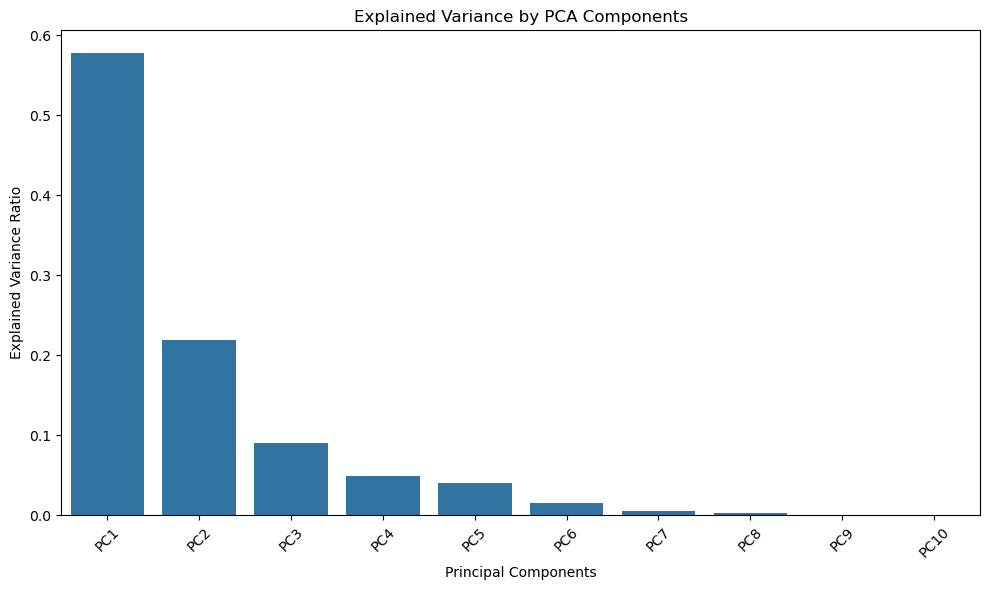

In [61]:
#Plotting the explained variance
plt.figure(figsize=(10, 6))
sns.barplot(x=[f"PC{i+1}" for i in range(len(explained_variance))], y=explained_variance)
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Components")
plt.title("Explained Variance by PCA Components")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the output above it can be concluded that PC1 captures 57.7% variance, PC2 adds 21.9% and PC3 adds 9.0%. Combined together PC1. PC2 and PC3 explain 88.6% of the data set. 88.6% is a good variance implying in this project the first three components can be used for visualizations and clustering.

In [62]:
import pandas as pd

# Create loadings dataframe
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=df_scaled.columns
).reset_index()

# Rename the index column to 'feature'
loadings.rename(columns={"index": "feature"}, inplace=True)

# Save to your processed folder
loadings.to_csv("data/processed/pca_loadings.csv", index=False)


In [63]:
#Creating a dataframe for the PCA

pca_df = pd.DataFrame(pca_components[:, :3], columns=["PC1", "PC2", "PC3"])

# Adding back identifiers and useful metadata
pca_df["part_id"] = df["part_id"]
pca_df["reject_type"] = df["reject_type"]
pca_df["entry_timestamp"] = df["entry_timestamp"]

pca_df.head()


,PC1,PC2,PC3,part_id,reject_type,entry_timestamp
0,0.193900,0.176702,0.633516,1,0,17-DEC-2025 23:41:36
1,0.654192,0.775788,-0.202026,2,0,17-DEC-2025 23:41:36
2,0.242095,0.726138,0.307516,3,0,17-DEC-2025 23:41:36
3,-0.659202,0.903606,0.441747,4,0,17-DEC-2025 23:41:38
4,0.064649,-0.409820,0.576200,5,0,17-DEC-2025 23:41:37


In [64]:
#Saving the PCA Output
pca_df.to_csv("data/processed/pca_output.csv", index=False)


In [65]:
#Checking if PCA Output is saved 
import os
os.listdir("data/processed")


['pca_output.csv',
 'pca_explained_variance.csv',
 'cleaned_data.csv',
 'pca_loadings.csv']

In [66]:
#Further verification by loading PCA Data into data frame
test = pd.read_csv("data/processed/pca_output.csv")
test.head()

,PC1,PC2,PC3,part_id,reject_type,entry_timestamp
0,0.193900,0.176702,0.633516,1,0,17-DEC-2025 23:41:36
1,0.654192,0.775788,-0.202026,2,0,17-DEC-2025 23:41:36
2,0.242095,0.726138,0.307516,3,0,17-DEC-2025 23:41:36
3,-0.659202,0.903606,0.441747,4,0,17-DEC-2025 23:41:38
4,0.064649,-0.409820,0.576200,5,0,17-DEC-2025 23:41:37


In [67]:
#Final check to ensure the number of rows match those in the original data set
print("Original rows:", df.shape[0])
print("PCA output rows:", test.shape[0])

Original rows: 7828
PCA output rows: 7828


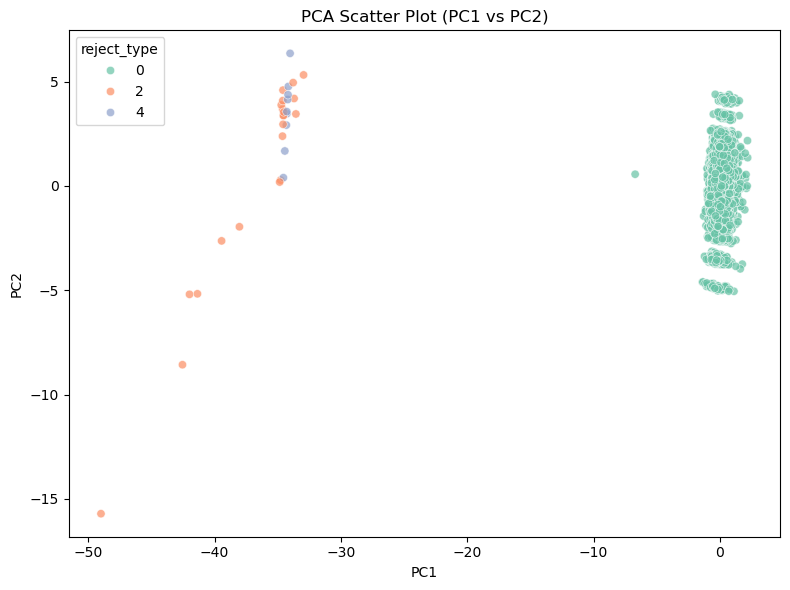

In [68]:
#Visualizing the PCA Scatter Plot

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="reject_type",
    palette="Set2",
    alpha=0.7
)
plt.title("PCA Scatter Plot (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()


PCA Scatter Plot Interpretation

This scatter plot visualizes the first two principal components (PC1 and PC2), which together explain approximately 79.6% of the total variance in the dataset. Each point represents a part, color-coded by its reject type.

PC1 captures the largest variance (57.7%), followed by PC2(21.9%), making this 2D projection highly representative of the original feature space.The plot reveals clear separation between reject types, especially between type 0 and types 2 and 4, suggesting that PCA has effectively captured meaningful structure.

This dimensionality reduction enables intuitive visualization and supports downstream tasks such as clustering and anomaly detection.

The clarity of separation indicates that reject classification may be feasible using unsupervised methods, and that PCA is a suitable preprocessing step for further analysis.


KMEANS CLUSTER OVERLAY(WITH LABELLED SCATTER PLOT)

In [69]:
#Applying unsupervised learning to the reduced PCA data set to allow for pattern discovery
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

# Fit KMeans with 3 clusters (you can tune this later)
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df["cluster"] = kmeans.fit_predict(pca_df[["PC1", "PC2", "PC3"]])

pca_df.head()

/opt/conda/envs/anaconda-2025.12-py312/lib/python3.12/site-packages/joblib/externals/loky/backend/context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-2025.12-py312/lib/python3.12/site-packages/joblib/externals/loky/backend/context.py", line 255, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


,PC1,PC2,PC3,part_id,reject_type,entry_timestamp,cluster
0,0.193900,0.176702,0.633516,1,0,17-DEC-2025 23:41:36,0
1,0.654192,0.775788,-0.202026,2,0,17-DEC-2025 23:41:36,0
2,0.242095,0.726138,0.307516,3,0,17-DEC-2025 23:41:36,0
3,-0.659202,0.903606,0.441747,4,0,17-DEC-2025 23:41:38,0
4,0.064649,-0.409820,0.576200,5,0,17-DEC-2025 23:41:37,2


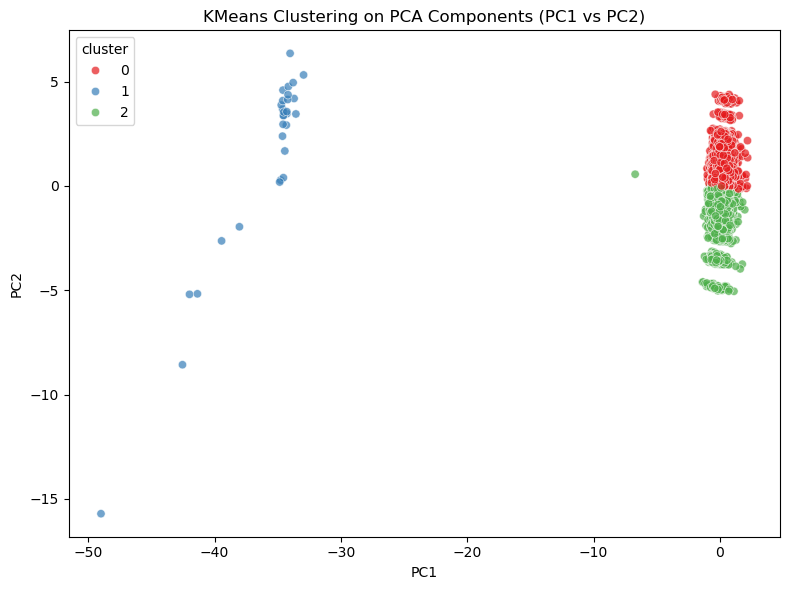

In [70]:
#Scatter plot with cluster overlay
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="cluster",
    palette="Set1",
    alpha=0.7
)
plt.title("KMeans Clustering on PCA Components (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

KMeans Clustering on PCA Components

This scatter plot visualizes the results of KMeans clustering applied to the PCA-transformed dataset.  
Each point represents a part, plotted using the first two principal components (PC1 and PC2), and color-coded by its assigned cluster label.

PC1 and PC2 together explain approximately 79.6% of the total variance, making this 2D projection highly representative.
Three clusters were identified using KMeans (n clusters=3), aligning with the number of known reject types (0, 2, 4).
The plot reveals distinct groupings, suggesting that parts naturally separate in PCA space based on underlying feature patterns.

This visualization supports the hypothesis that unsupervised clustering can uncover meaningful structure in diagnostics data, even without access to reject labels.  
It also provides a foundation for anomaly detection, process optimization, and further classification tasks.


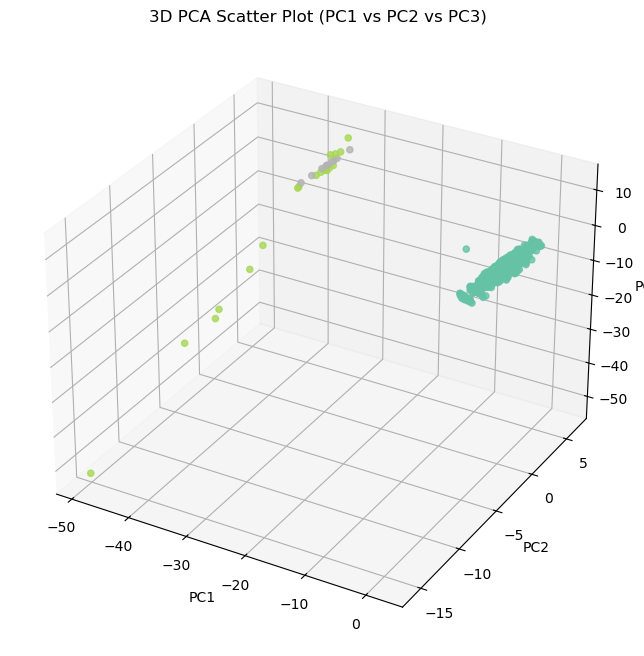

In [71]:
#PCA Scatter plots against PC1, PC2 and PC3

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    pca_df["PC3"],
    c=pca_df["reject_type"],
    cmap="Set2",
    alpha=0.8
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3D PCA Scatter Plot (PC1 vs PC2 vs PC3)")
plt.show()


3D PCA Scatter Plot(PC1 vs PC2 vs PC3)

This 3D scatter plot visualizes the first three principal components derived from PCA, which together explain 88.6% of the total variance in the dataset. Each point represents a part, plotted in three-dimensional space using PC1, PC2, and PC3.

PC1 (57.7%), PC2 (21.9%), and PC3 (9.0%) capture the dominant structure in the data. The spatial separation between points suggests that parts with different characteristics occupy distinct regions in PCA space. This visualization enhances interpretability by revealing subtle patterns that may not be visible in 2D plots.

The 3D view supports deeper inspection of reject type distribution, potential subclusters, and anomalies. It also strengthens the case for using PCA as a dimensionality reduction technique prior to clustering or classification.

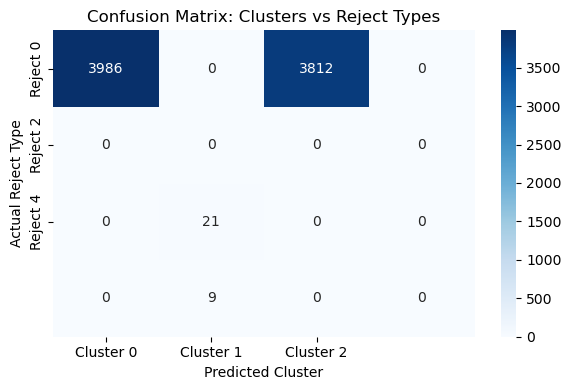

In [72]:
#Confusion Matrix to compare the unsupervised cluster labels from KMeans with the actual reject_type labels

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Computing the confusion matrix
conf_matrix = confusion_matrix(pca_df["reject_type"], pca_df["cluster"])

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"], yticklabels=["Reject 0", "Reject 2", "Reject 4"])
plt.xlabel("Predicted Cluster")
plt.ylabel("Actual Reject Type")
plt.title("Confusion Matrix: Clusters vs Reject Types")
plt.tight_layout()
plt.show()


Confusion Matrix: Clusters vs Reject Types

This confusion matrix compares the KMeans cluster assignments with the actual reject type labels.  
It provides insight into how well the unsupervised clustering aligns with known categories.

Diagonal dominance indicates strong alignment between clusters and reject types.
Off-diagonal values suggest overlap or ambiguity between categories, which may reflect noise, feature similarity, or process variation.
The matrix reveals that Reject 0 is split between Cluster 0 and Cluster 2, while Reject 4 is mostly captured by Cluster 1.
Reject 2 appears absent, possibly due to filtering, low frequency, or preprocessing exclusions.

This analysis validates the clustering approach and highlights areas for further investigation.  
It supports the use of PCA + KMeans as a viable pipeline for diagnostics classification, anomaly detection, and process optimization.


In [73]:
#Silhouette score to measure how well each point fits within its cluster.

from sklearn.metrics import silhouette_score

# Computing silhouette score using PCA components
score = silhouette_score(pca_df[["PC1", "PC2", "PC3"]], pca_df["cluster"])
print(f"Silhouette Score for KMeans (n=3): {score:.3f}")

Silhouette Score for KMeans (n=3): 0.460


The silhouette score measures how well each part fits within its assigned cluster, based on cohesion (within-cluster similarity) and separation (between-cluster dissimilarity).  
Scores range from -1 to 1, with higher values indicating better-defined clusters.

Score obtained: 0.460  
This suggests that the clusters are reasonably well-separated and internally consistent.
The result supports the choice of n clusters=3 as a valid starting point for this dataset.
Further tuning (e.g., silhouette analysis across multiple k values) could be explored to optimize clustering performance.

This metric adds analytical rigor to the clustering step and strengthens the justification for using PCA + KMeans in diagnostics analytics.


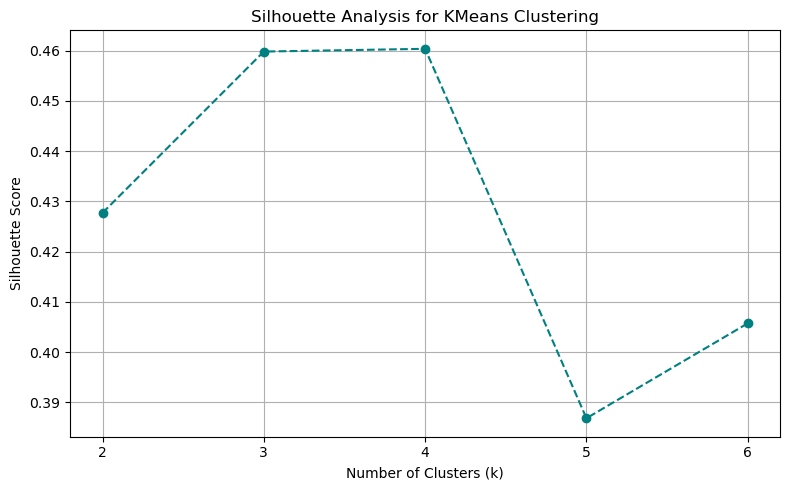

In [77]:
# Silhouette analysis across multiple k values (k=2 to k=6)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Preparing the data
X = pca_df[["PC1", "PC2", "PC3"]]

# Range of k values
k_values = range(2, 7)
scores = []

# Looping through k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

# Plotting silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o', linestyle='--', color='teal')
plt.title("Silhouette Analysis for KMeans Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()


Silhouette Analysis Across Multiple Cluster Counts

This plot shows the silhouette scores for KMeans clustering using k values from 2 to 6.  
The silhouette score measures how well each part fits within its assigned cluster, balancing cohesion (within-cluster similarity) and separation (between-cluster dissimilarity).

Peak scores at k=3 and k=4 at approximately 0.460 suggest these are the most appropriate cluster counts for this data set. A sharp drop at k=5 at approximately 0.390 indicates poor separation and possible over-clustering. The slight recovery at k=6 at approximately 0.410 is not strong enough to justify additional complexity.

This analysis supports the choice of n clusters=3 used earlier, while also validating that k=4 could be explored as an alternative. Silhouette analysis adds statistical rigor to the clustering step and strengthens the reproducibility of the pipeline.


HOTELLING'S T² and Q‑RESIDUALS

In [78]:
#Identifying columns used for PCA
pca_features = ["col1", "col2", ..., "col10"]

In [79]:
#Determining the PCA column names
scaled_df.columns

Index(['tare_weight_(g)_scaled', 'gross_weight_(g)_scaled',
       'net_weight__(g)_scaled', 'actual_collapse_(mm)_scaled',
       'weldtime_(sec)_scaled', 'weld_power_(wt)_scaled',
       'weld_zero_point_(mm)_scaled', 'weld_clamp_force_(n)_scaled',
       'total_collapse_(mm)_scaled', 'rate_scaled', 'part_id', 'pump_id',
       'tare_scale_id', 'gross_scale_id', 'cap_station_id', 'welder_id',
       'reject_type', 'src', 'entry_timestamp'],
      dtype='object')

In [80]:
#Extracting only these columns from scaled df
pca_features = [
    'tare_weight_(g)_scaled',
    'gross_weight_(g)_scaled',
    'net_weight__(g)_scaled',
    'actual_collapse_(mm)_scaled',
    'weldtime_(sec)_scaled',
    'weld_power_(wt)_scaled',
    'weld_zero_point_(mm)_scaled',
    'weld_clamp_force_(n)_scaled',
    'total_collapse_(mm)_scaled',
    'rate_scaled'
]

X = scaled_df[pca_features].values  # shape (n_samples, 10)

In [81]:
#Reconstructing PCA
scores = pca_df[["PC1", "PC2", "PC3"]].values
P = pca.components_[:3, :]  # loadings for first 3 PCs

X_hat = scores @ P + pca.mean_

In [82]:
#Determining Q-residuals
import numpy as np

# Reconstruct original data using only the first 3 components
Q = np.sum((X - X_hat)**2, axis=1)
pca_df["Q_residuals"] = Q

pca_df["Q_residuals"].head()

0    2.446170
1    0.407410
2    0.932836
3    1.009094
4    1.856135
Name: Q_residuals, dtype: float64

In [83]:
#Determining Hotelling's T²  

import numpy as np

scores = pca_df[["PC1", "PC2", "PC3"]].values
cov_matrix = np.cov(scores, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_scores = np.mean(scores, axis=0)

# Hotelling's T² calculation
T2 = np.array([ (x - mean_scores).T @ inv_cov_matrix @ (x - mean_scores) for x in scores ])
pca_df["T2"] = T2


In [84]:
#Checking if the T2 column was added to the dataset
pca_df[["T2"]].head()


,T2
0,0.518139
1,0.438508
2,0.395824
3,0.739192
4,0.495654


In [85]:
#Adding control limits and flags

from scipy.stats import f

# Hotelling T² limit (95%)
n = scores.shape[0]
a = scores.shape[1]
T2_limit = (a*(n-1)/(n-a)) * f.ppf(0.95, a, n-a)

# Q-residuals limit (95%) using empirical threshold
Q_limit = np.percentile(pca_df["Q_residuals"], 95)

# Flag anomalies
pca_df["T2_flag"] = pca_df["T2"] > T2_limit
pca_df["Q_flag"] = pca_df["Q_residuals"] > Q_limit
pca_df["Critical_flag"] = pca_df["T2_flag"] & pca_df["Q_flag"]


In [86]:
#Visualization of critical anomalies
pca_df[pca_df["Critical_flag"] == True]


,PC1,PC2,PC3,part_id,reject_type,entry_timestamp,cluster,Q_residuals,T2,T2_flag,Q_flag,Critical_flag
256,-0.342295,-4.907916,0.658023,257,0,17-DEC-2025 23:50:10,2,3.463038,12.795083,True,True,True
447,-1.382349,-4.608272,0.969213,448,0,17-DEC-2025 23:53:08,2,5.878541,12.316179,True,True,True
694,0.879255,4.199694,-0.519485,695,0,18-DEC-2025 00:49:33,0,2.446184,9.442907,True,True,True
829,-0.592065,-4.892327,0.733009,830,0,18-DEC-2025 00:51:47,2,7.029264,12.891045,True,True,True
885,0.668462,4.147135,-0.622104,886,0,18-DEC-2025 00:52:44,0,2.421236,9.301710,True,True,True
1784,-1.050508,-4.814966,0.814438,1785,0,18-DEC-2025 01:11:09,2,8.584617,12.809865,True,True,True
1928,-6.707551,0.562848,1.101526,1929,0,18-DEC-2025 01:13:51,2,202.195398,10.317857,True,True,True
1975,0.177414,-5.006603,0.616211,1976,0,18-DEC-2025 01:14:30,2,2.224865,13.209996,True,True,True
2166,-0.552028,-4.818210,0.715496,2167,0,18-DEC-2025 01:18:13,2,3.617004,12.485263,True,True,True
2226,1.069308,4.055229,-0.759517,2227,0,18-DEC-2025 01:19:16,0,3.236090,9.286953,True,True,True


Visualization of Critical Anomalies

The table above shows all observations flagged as critical anomalies, meaning they exceeded both:

Hotelling’s T² limit indicates multivariate drift  
Q‑Residuals limit indicates unexplained variation  

Even though many of these parts have reject type = 0, their multivariate behaviour (PC1, PC2, PC3) is statistically abnormal compared to the rest of the dataset.

What This Means
Cluster 2 anomalies indicate systematic drift in weld and collapse behaviour.  
Cluster 0 anomalies indicate isolated unusual events within normal operating space.  
Cluster 1 anomalies represent extreme outliers driven by unusual weight or net‑weight behaviour.

These anomalies highlight early signs of process instability that would not be visible through univariate checks or reject counts. 


In [87]:
#Checking which of the ten analysed PCA variables dominate each of the PC1, PC2 and PC3

pd.DataFrame(pca.components_[:3], columns=pca_features, index=["PC1", "PC2", "PC3"])


,tare_weight_(g)_scaled,gross_weight_(g)_scaled,net_weight__(g)_scaled,actual_collapse_(mm)_scaled,weldtime_(sec)_scaled,weld_power_(wt)_scaled,weld_zero_point_(mm)_scaled,weld_clamp_force_(n)_scaled,total_collapse_(mm)_scaled,rate_scaled
PC1,0.033163,0.085695,0.214443,0.418092,0.365342,0.420282,0.349129,0.427744,0.394718,-0.0
PC2,0.697058,0.698747,0.111698,-0.049476,-0.067359,-0.043168,-0.045712,-0.044540,-0.021535,0.0
PC3,-0.215902,0.031268,0.952988,-0.108648,-0.081044,-0.073607,-0.059333,-0.069962,-0.109626,-0.0


PCA shows that even parts with no rejects can behave abnormally when considering all variables together.
PC1 captures weld and collapse behaviour, PC2 captures weight‑system behaviour, and PC3 captures net‑weight anomalies.
Parts flagged by T² and Q‑Residuals show unusual combinations of these behaviours, indicating early drift or instability before rejects appear.

T² vs Q MAP, TIME SERIES ANOMALY PLOT,AND CLUSTER DISTRIBUTION

Next Step : 
The following visualizations (T² vs Q map, time‑series anomaly plot, and cluster distribution) help identify:
when anomalies occur  which operating region they belong to and which PCA components contribute most to the abnormal behaviour 

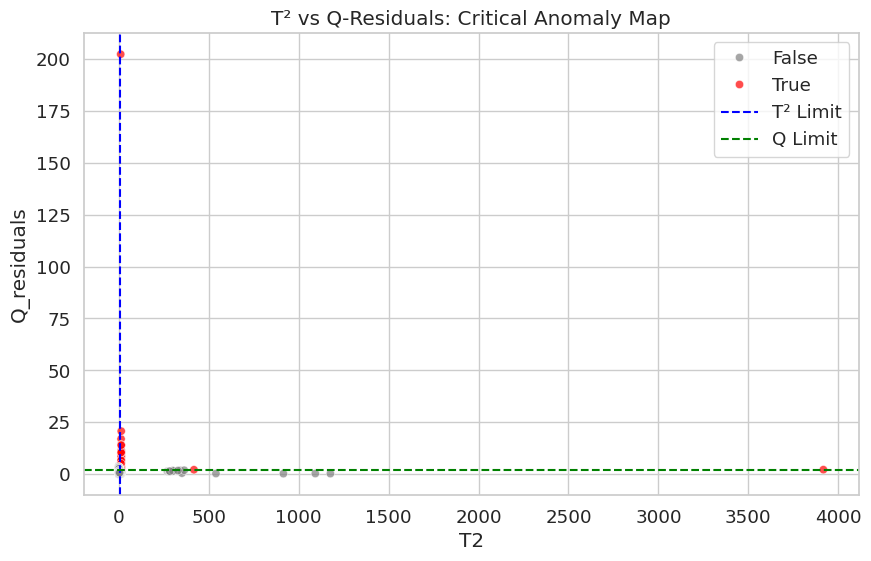

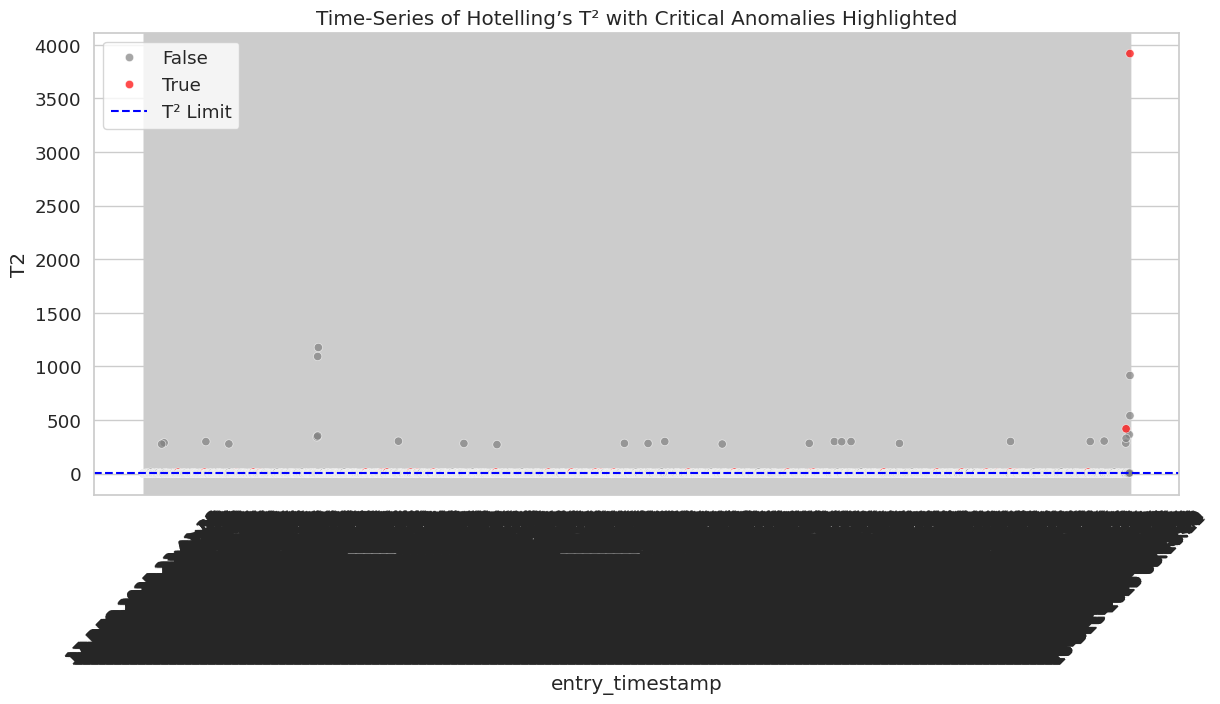

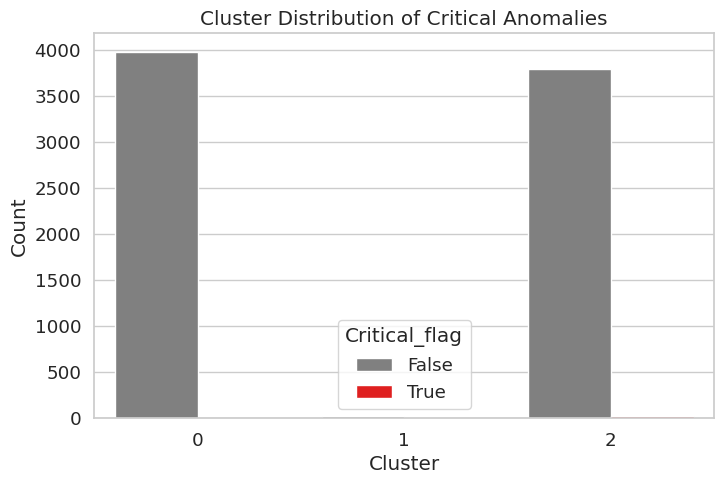

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring seaborn style
sns.set(style="whitegrid", font_scale=1.2)

# 1. T² vs Q‑Residuals Anomaly Map
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df,
    x="T2",
    y="Q_residuals",
    hue="Critical_flag",
    palette={False: "grey", True: "red"},
    alpha=0.7
)
plt.axvline(T2_limit, color="blue", linestyle="--", label="T² Limit")
plt.axhline(Q_limit, color="green", linestyle="--", label="Q Limit")
plt.title("T² vs Q‑Residuals: Critical Anomaly Map")
plt.legend()
plt.show()

# 2. Time‑Series Plot of Critical Events
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=pca_df,
    x="entry_timestamp",
    y="T2",
    hue="Critical_flag",
    palette={False: "grey", True: "red"},
    alpha=0.7
)
plt.axhline(T2_limit, color="blue", linestyle="--", label="T² Limit")
plt.title("Time‑Series of Hotelling’s T² with Critical Anomalies Highlighted")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 3. Cluster Distribution of Anomalies
plt.figure(figsize=(8, 5))
sns.countplot(
    data=pca_df,
    x="cluster",
    hue="Critical_flag",
    palette={False: "grey", True: "red"}
)
plt.title("Cluster Distribution of Critical Anomalies")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


Visualization of Critical Anomalies

This section presents three key visualizations that explain the nature, timing, and distribution of critical anomalies detected using PCA-based monitoring.

1. T² vs Q‑Residuals Anomaly Map

This scatter plot shows each observation based on its Hotelling’s T² score (x-axis) and Q‑Residual value (y-axis).
Red points indicate critical anomalies (exceed both limits).
The blue dashed line marks the T² control limit.
The green dashed line marks the Q‑Residual control limit.

Interpretation:
Points above both limits are statistically abnormal.
These parts may pass inspection (reject_type = 0) but behave unusually in multivariate space.
This plot helps distinguish between drift, noise, and combined anomalies.

2. Time-Series of Hotelling’s T²

This plot shows how T² values evolve over time, with each point representing a part.
Red points highlight critical anomalies.
The blue dashed line indicates the T² control threshold.

Interpretation:
Clusters of red points suggest periods of process instability.
Isolated red points may indicate rare events or sensor noise.
A rising trend in T² values could signal gradual drift or wear.

This helps identify when the process begins to deviate from normal behaviour, even before rejects appear.

3. Cluster Distribution of Critical Anomalies

This bar chart shows how critical anomalies are distributed across PCA clusters:
Cluster 0 represents the normal operating region.
Cluster 2 represents systematic drift.
Cluster 1 represents extreme outliers.

Interpretation:
Most anomalies fall into cluster 2, suggesting subtle but persistent instability.
Few or no anomalies in cluster 1 indicate rare shocks are not the main issue.
This supports the hypothesis that the process is drifting, not failing suddenly.

Why These Visuals Matter

Together, these plots provide a multivariate view of process health:
Engineers can see when and where the process becomes unstable.
Supervisors can link anomalies to shifts, machines, or operators.
Quality teams can detect early warning signs before rejects increase.
Data science teams can identify which PCA components and variables drive the anomalies.

This supports predictive maintenance, proactive decision-making, and continuous improvement.


EXPORTING PCA RESULTS TO CSV

In [91]:
# Saving PCA results to my GitHub dashboard's data folder
pca_df.to_csv("data/pca_results.csv", index=False)

In [92]:
#Checking if the above PCA output has been saved 

import os
print(os.listdir("data"))

['pca_results.csv', 'raw', 'limits.json', '.ipynb_checkpoints', 'processed']


In [93]:
import json

# Save T² and Q control limits
limits = {
    "T2_limit": T2_limit,
    "Q_limit": Q_limit
}

with open("data/limits.json", "w") as f:
    json.dump(limits, f)

In [94]:
#Verifying if the limits in the above step are saved 

import os
print(os.listdir("data"))

['pca_results.csv', 'raw', 'limits.json', '.ipynb_checkpoints', 'processed']


In [95]:
#Checking the contents of limits.json

import json

with open("data/limits.json", "r") as f:
    limits_check = json.load(f)

print(limits_check)


{'T2_limit': 7.820129939353904, 'Q_limit': 2.181668432608534}


In [96]:
#Checking the datatypes of limits.json
print(type(limits_check["T2_limit"]), type(limits_check["Q_limit"]))

<class 'float'> <class 'float'>


Loading data in app.py in my GitHub Dashboard

In [97]:
import streamlit as st
import pandas as pd
import json

# Set page config
st.set_page_config(page_title="PCA Anomaly Dashboard", layout="wide")

# Load PCA results
pca_df = pd.read_csv("data/pca_results.csv")

# Load control limits
with open("data/limits.json", "r") as f:
    limits = json.load(f)

T2_limit = limits["T2_limit"]
Q_limit = limits["Q_limit"]

# Title
st.title(" PCA-Based Anomaly Detection Dashboard")
st.markdown("This dashboard visualizes multivariate anomalies in a real-time automated filling line using PCA.")


2026-01-22 14:46:02.851 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 14:46:02.885 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 14:46:03.223 
  command:

    streamlit run /opt/conda/envs/anaconda-2025.12-py312/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2026-01-22 14:46:03.225 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 14:46:03.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 14:46:03.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 14:46:03.227 Thread 'MainThread': missing ScriptRunContext! This warning

DeltaGenerator()

In [98]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] [TARGET] [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [99]:
df.to_csv("data/processed/cleaned_data.csv", index=False)

In [100]:
import pandas as pd
df = pd.read_csv("data/processed/cleaned_data.csv")
print(df.columns.tolist())


['tare_weight_(g)_scaled', 'gross_weight_(g)_scaled', 'net_weight__(g)_scaled', 'actual_collapse_(mm)_scaled', 'weldtime_(sec)_scaled', 'weld_power_(wt)_scaled', 'weld_zero_point_(mm)_scaled', 'weld_clamp_force_(n)_scaled', 'total_collapse_(mm)_scaled', 'rate_scaled', 'part_id', 'pump_id', 'tare_scale_id', 'gross_scale_id', 'cap_station_id', 'welder_id', 'reject_type', 'src', 'entry_timestamp']


In [101]:
import pandas as pd
df = pd.read_csv("data/processed/pca_output.csv")
print(df.columns.tolist())


['PC1', 'PC2', 'PC3', 'part_id', 'reject_type', 'entry_timestamp']
